In [1]:
from functools import partial
from glob import glob
import os
import time
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from tqdm import tqdm, tqdm_notebook

%matplotlib inline

In [83]:
def color_drop(img):
    img = img.copy()
    
    color_set = {0, 1, 2}
    drop_set = set(np.random.choice((0, 1, 2), size=2, replace=False).tolist())
            
    idx_remained = next(iter(color_set - drop_set))
                    
    color_std = img[:, :, idx_remained].std() * 0.01
            
    for color_idx in drop_set:
#         print("Hey! {}".format(color_idx))
        mean = img[:, :, color_idx].mean()
        channel_data = np.random.normal(mean, color_std, size=[img.shape[0], img.shape[1]])
#         print(channel_data[:10, :10])
        img[:, :, color_idx] = channel_data
                
    return img

def degenerate(img):
    img = img.copy()
    input_size = img.shape[0]
    
    p = np.random.uniform(low=0.1, size=1)        
    degen_size = int(p * input_size)

    img = cv2.resize(img, (degen_size, degen_size))
    img = cv2.resize(img, (input_size, input_size))
    
    return img

    

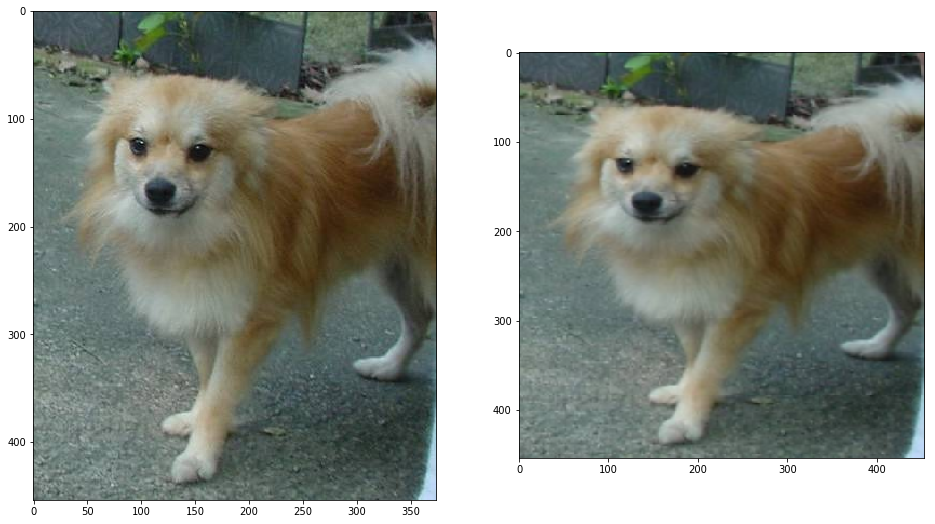

In [88]:
data_path = glob('./data/train/dogs/*.jpg') + glob('./data/train/cats/*.jpg')
idx = 100

img = cv2.imread(data_path[idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_aug = color_drop(img)
img_aug = degenerate(img)

fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(img)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_aug)
plt.show()

In [20]:
img[:5, :5, 0], img_aug[:5, :5, 0]

(array([[234, 212, 209, 216, 211],
        [212, 186, 177, 181, 178],
        [215, 184, 170, 173, 171],
        [223, 191, 178, 181, 182],
        [210, 180, 170, 177, 177]], dtype=uint8),
 array([[234, 212, 209, 216, 211],
        [212, 186, 177, 181, 178],
        [215, 184, 170, 173, 171],
        [223, 191, 178, 181, 182],
        [210, 180, 170, 177, 177]], dtype=uint8))